# Rapport Nicolas CHARPENTIER


Le but de ce projet est d’analyser les différentes équipes composant ce championnat, leurs victoires, défaites, buts marqués et encaissés, et ensuite de pouvoir prédire certaines victoires et au finale, essayer de prédire le possible gagnant du championnat.

Nous savons que les grands championnats européens sont très indécis et improbables, nous pensons en particulier au club de Leicester remportant le championnat d’Angleterre l’an dernier avec un budget très inférieur aux grands clubs anglais. Ce club connu pour le rugby qui venait directement de deuxième ligue anglaise. Il est aussi possible d’énoncer Montpellier en 2012, qui fût champion de France à la surprise générale devant le grandissime favoris (le paris saint germain).

C’est pour cela que nous allons nous intéresser à un championnat d’une division inférieur, car les statistiques sont beaucoup plus fiables du fait qu’il y a moins d’argent en jeux, moins de professionnalisme et moins de variables extérieures. 

J’ai choisi la deuxième division du championnat allemand : La Bundesliga 2.
J’ai choisi ce championnat car les championnats allemands ont pour réputation d’être stable et homogène, ce qui convient parfaitement pour nos analyses.

Ces analyses seront effectuées sur les 9 dernières années, ce qui permettra d'avoir un jeu de données assez dense.


# 1.Présentation et première visualisation des données.

Pour débuter, importons les librairies qui nous seront nécessaires ainsi que tous nos jeux de données : 

In [862]:
#Import des librairies
import numpy as np
import scipy.stats as ss
import sklearn
import pandas as pd
%matplotlib inline
import csv as csv
import StringIO
import pydotplus
from sklearn.externals.six import StringIO 
from sklearn import datasets,tree
from matplotlib import pyplot
from IPython.display import Image

#Import de données
data2007 = pd.read_csv('Bundesliga2_2006_2007.csv', header=0)
data2008 = pd.read_csv('Bundesliga2_2007_2008.csv', header=0)
data2009 = pd.read_csv('Bundesliga2_2008_2009.csv', header=0)
data2010 = pd.read_csv('Bundesliga2_2009_2010.csv', header=0)
data2011 = pd.read_csv('Bundesliga2_2010_2011.csv', header=0)
data2012 = pd.read_csv('Bundesliga2_2011_2012.csv', header=0)
data2013 = pd.read_csv('Bundesliga2_2012_2013.csv', header=0)
data2014 = pd.read_csv('Bundesliga2_2013_2014.csv', header=0)
data2015 = pd.read_csv('Bundesliga2_2014_2015.csv', header=0)
data2016 = pd.read_csv('Bundesliga2_2015_2016.csv', header=0)
data2017 = pd.read_csv('Bundesliga2_2016_2017.csv', header=0)

A noter que les données de la saison 2016-2017 ne sont pas complètent étant donné que la saison n'est pas terminé, mais nous l'utiliserons plus tard car elle nous servira de test pour vérifier si nos prédictions sont cohérentes.

Effectuons désormais une première visualisation de ces données sur une saison. Précisons que pour chaque année, le formalisme est le même.

In [863]:
#Visualisation et caractéristiques
print(data2016.head(2))
print(data2016.dtypes)

  Div      Date       HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0  D2  24/07/15       Duisburg  Kaiserslautern     1     3   A     0     3   
1  D2  25/07/15  Frankfurt FSV      RB Leipzig     0     1   A     0     0   

  HTR  ...   BbAv<2.5  BbAH  BbAHh  BbMxAHH  BbAvAHH  BbMxAHA  BbAvAHA  PSCH  \
0   A  ...       1.62    22   0.25     1.88     1.83     2.06     1.98  3.29   
1   D  ...       1.75    22   0.50     1.95     1.89     1.99     1.93  4.78   

   PSCD  PSCA  
0  3.37  2.36  
1  3.98  1.78  

[2 rows x 52 columns]
Div          object
Date         object
HomeTeam     object
AwayTeam     object
FTHG          int64
FTAG          int64
FTR          object
HTHG          int64
HTAG          int64
HTR          object
B365H       float64
B365D       float64
B365A       float64
BWH         float64
BWD         float64
BWA         float64
IWH         float64
IWD         float64
IWA         float64
LBH         float64
LBD         float64
LBA         float64
PSH         f

Nous voyons ici 2 exemples de lignes contenu dans ce dataset ainsi que ses colonnes et types.
Comme vous vous en doutez, une ligne correspond à un match.

Nous constatons qu'il y a énormément de données et de colonnes, nous allons pour le moment nous appuyer sur quelques unes de celles ci dont voici les caractéristiques :
    - HomeTeam : Equipe jouant à domicile
    - AwayTeam : Equipe jouant à l'extérieur
    - FTR : Resultat du match terminé :
        - 'H' si l'équipe à domicile gagne le match
        - 'D' si le résultat est un match nul
        - 'A' si l'équipe à l'extérieur gagne le match
    - HTR : Résultat du match à la mi-temps :
        - 'H' si l'équipe à domicile gagne le match à la mi-temps
        - 'D' si le résultat est un match nul à la mi-temps
        - 'A' si l'équipe à l'extérieur gagne le match à la mi-temps

Maintenant que nous avons un peu plus de connaissances sur nos données, nous allons pouvoir commencer à les analyser, et tirer quelques tendances.

# 2.Analyse 

## 2.1. Analyse générale de deux saisons


Comme dit précédement, essayons de tirer une tendances sur deux saisons pour le moment :

In [864]:
#fonction count nb victoires par equipes
def nbVictoires(data, year):
    tab2014 = []
    for team in data['HomeTeam']:
        res = data[(data['HomeTeam']==team) & (data['FTR']=='H') | (data['AwayTeam']==team) & (data['FTR']=='A')]
        tab1 = [res['HomeTeam'].count() ,team]
        if tab1 not in tab2014:
            tab2014.append([res['HomeTeam'].count(), team ])
    tab2014.sort() 
    print('Nombres de victoires par equipe pour la saison ' + year + ' :')
    for i in tab2014:
        print(i)

        
#fonction count nb defaites par equipes        
def nbDefaites(data, year):
    tab2014 = []
    for team in data['HomeTeam']:
        res = data[(data['HomeTeam']==team) & (data['FTR']=='A') | (data['AwayTeam']==team) & (data['FTR']=='H')]
        tab1 = [res['HomeTeam'].count() ,team]
        if tab1 not in tab2014:
            tab2014.append([res['HomeTeam'].count(), team ])
    tab2014.sort() 
    print('Nombres de défaites par equipe pour la saison ' + year + ' :')
    for i in tab2014:
        print(i)

        
#Nombre de victoire 
#df2012 = data2012[['HomeTeam','AwayTeam','FTR']]
#df2013 = data2013[['HomeTeam','AwayTeam','FTR']]
#df2014 = data2014[['HomeTeam','AwayTeam','FTR']]
df2015 = data2015[['HomeTeam','AwayTeam','FTR']]
df2016 = data2016[['HomeTeam','AwayTeam','FTR']]

#nbVictoires(df2012, '2012')
#nbVictoires(df2013, '2013')
#nbVictoires(df2014, '2014')
nbVictoires(df2015, '2015')
nbDefaites(df2015, '2015')
nbVictoires(df2016, '2016')
nbDefaites(df2016, '2016')



    

Nombres de victoires par equipe pour la saison 2015 :
[7, 'Aalen']
[8, 'Greuther Furth']
[9, 'Bochum']
[9, 'Erzgebirge Aue']
[9, 'Munich 1860']
[10, 'Frankfurt FSV']
[10, 'Sandhausen']
[10, 'St Pauli']
[11, 'Fortuna Dusseldorf']
[12, 'Heidenheim']
[12, 'Union Berlin']
[13, 'Nurnberg']
[13, 'RB Leipzig']
[14, 'Kaiserslautern']
[15, 'Braunschweig']
[15, 'Darmstadt']
[15, 'Karlsruhe']
[17, 'Ingolstadt']
Nombres de défaites par equipe pour la saison 2015 :
[4, 'Ingolstadt']
[5, 'Darmstadt']
[6, 'Kaiserslautern']
[6, 'Karlsruhe']
[10, 'Bochum']
[10, 'RB Leipzig']
[11, 'Union Berlin']
[12, 'Fortuna Dusseldorf']
[12, 'Heidenheim']
[12, 'Sandhausen']
[13, 'Greuther Furth']
[14, 'Braunschweig']
[15, 'Aalen']
[15, 'Frankfurt FSV']
[15, 'Nurnberg']
[16, 'Erzgebirge Aue']
[16, 'Munich 1860']
[17, 'St Pauli']
Nombres de victoires par equipe pour la saison 2016 :
[6, 'Paderborn']
[7, 'Duisburg']
[8, 'Bielefeld']
[8, 'Frankfurt FSV']
[8, 'Munich 1860']
[9, 'Fortuna Dusseldorf']
[11, 'Heidenheim']
[12

Nous pourrions être tenté de dire que les champions des années 2015 et 2016 seraient respectivement Ingolstadt et Freiburg, vérifions cela.
Comparons ces premiers résultats avec les résultats réels de ces 2 saisons, afin de vérifier ceux-ci :

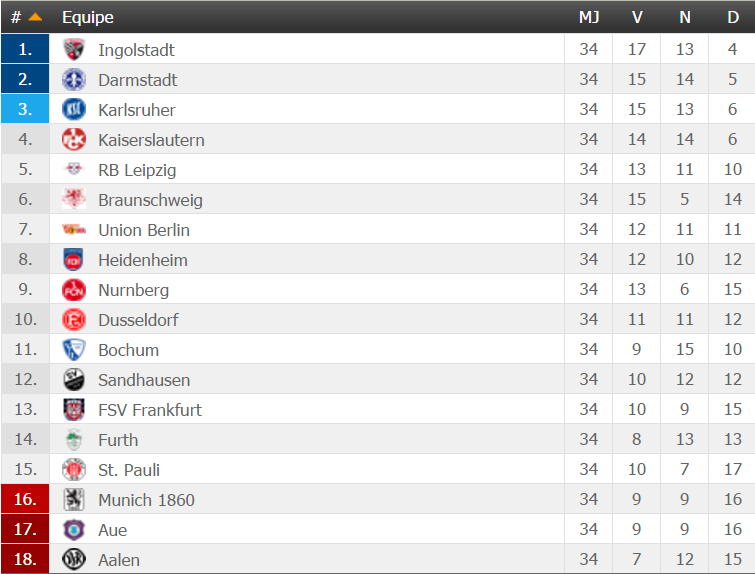

In [865]:
#Aperçu du classement général de fin de saison 2015
Image(filename='result2015.png')

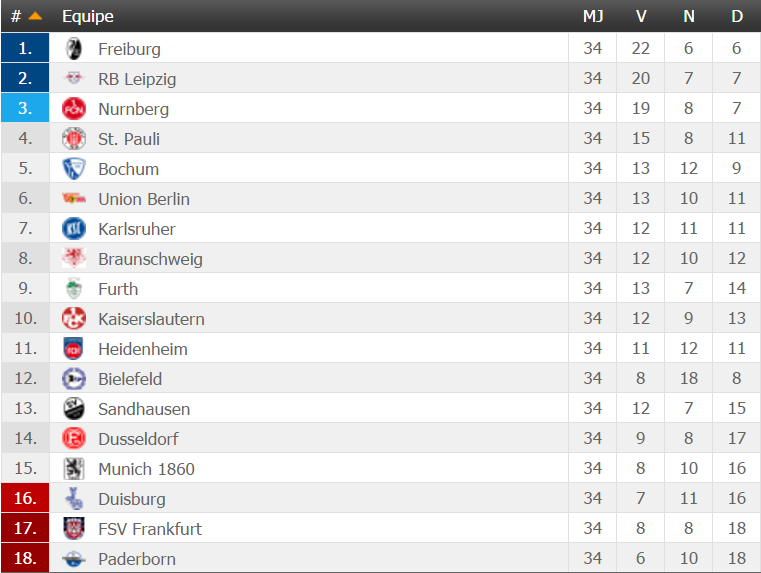

In [866]:
#Aperçu du classement général de fin de saison 2016
Image(filename='result2016.png')

Grace à ce comparatif, nous voyons que nos résultats étaient correctes.

Cependant, nous voyons avec ce comparatif sur 2 saisons que les 3 premiers de la saison 2015 ne font plus parti de la saison 2016, ceci à cause du système de montés/descentes dans la division supérieure/inférieure des 3 premières et 3 dernières équipes à la fin du championnat.

Ceci est embetant car, comment prédire le futur vainqueur d'un championnat si les données ne sont pas les mêmes d'une année à l'autre ? En effet, il y aura toujours 6 équipes différentes d'une année à l'autre.

Etant donnée cette forte contrainte, j'ai décidé de changer de façon de faire, et de ne plus essayer de prédire le futur gagnant du championnat, mais uniquement les gagnants de certains matchs, ainsi que leurs résultats.  

Pour cela, j'ai choisi d'analyser quelles équipes étaient le plus représentées sur cette période de 9 ans afin d'avoir le maximum de données passées, et de les analyser entres elles.

Commençons d'abord par déterminer quelles sont ces équipes :

In [867]:
#recuperation des equipes de chaque saison

allteams2007 = data2007['HomeTeam']
teams2007 = []
for i in allteams2007:
    if i not in teams2007:
        teams2007.append(i)
print('Equipes de la saison 2007 : ')
print(teams2007)
print('')

allteams2008 = data2008['HomeTeam']
teams2008 = []
for i in allteams2008:
    if i not in teams2008:
        teams2008.append(i)
print('Equipes de la saison 2008 : ')
print(teams2008)
print('')

allteams2009 = data2009['HomeTeam']
teams2009 = []
for i in allteams2009:
    if i not in teams2009:
        teams2009.append(i)
print('Equipes de la saison 2009 : ')
print(teams2009)
print('')

allteams2010 = data2010['HomeTeam']
teams2010 = []
for i in allteams2010:
    if i not in teams2010:
        teams2010.append(i)
print('Equipes de la saison 2010 : ')
print(teams2010)
print('')

allteams2011 = data2011['HomeTeam']
teams2011 = []
for i in allteams2011:
    if i not in teams2011:
        teams2011.append(i)
print('Equipes de la saison 2011 : ')
print(teams2011)
print('')


allteams2012 = data2012['HomeTeam']
teams2012 = []
for i in allteams2012:
    if i not in teams2012:
        teams2012.append(i)
print('Equipes de la saison 2012 : ')
print(teams2012)
print('')

allteams2013 = data2013['HomeTeam']
teams2013 = []
for i in allteams2013:
    if i not in teams2013:
        teams2013.append(i)
print('Equipes de la saison 2013 : ')
print(teams2013)
print('')

allteams2014 = data2014['HomeTeam']
teams2014 = []
for i in allteams2014:
    if i not in teams2014:
        teams2014.append(i)
print('Equipes de la saison 2014 : ')
print(teams2014)
print('')

allteams2015 = data2015['HomeTeam']
teams2015 = []
for i in allteams2015:
    if i not in teams2015:
        teams2015.append(i)
print('Equipes de la saison 2015 : ')
print(teams2015)
print('')

allteams2016 = data2016['HomeTeam']
teams2016 = []
for i in allteams2016:
    if i not in teams2016:
        teams2016.append(i)
print('Equipes de la saison 2016 : ')
print(teams2016)
print('')


#Recuperation des equipes ayant participe a la bundesliga2 les X saisons 
all_teams = sum([teams2010,teams2011,teams2012, teams2013, teams2014, teams2015, teams2016], [])
tab = []
kk = 0
for i in all_teams:
    if i not in tab:
        tab.append(i)
print('Equipes ayant participées aux 6 saisons :')
newtab = []
for i in tab:
    kk = all_teams.count(i)
    if kk >= 6:
        newtab.append(i)
print(newtab)

Equipes de la saison 2007 : 
['Burghausen', 'Kaiserslautern', 'Offenbach', 'Braunschweig', 'Duisburg', 'Erzgebirge Aue', 'Freiburg', 'Greuther Furth', 'Augsburg', 'CZ Jena', 'Hansa Rostock', 'Munich 1860', 'Essen', 'FC Koln', 'Koblenz', 'Paderborn', 'Unterhaching', 'Karlsruhe']

Equipes de la saison 2008 : 
['Aachen', 'Osnabruck', 'St Pauli', 'Augsburg', 'Erzgebirge Aue', 'Hoffenheim', 'Mainz', 'Paderborn', 'Kaiserslautern', 'Freiburg', 'Koblenz', 'Wehen', 'CZ Jena', 'Greuther Furth', "M'gladbach", 'Munich 1860', 'Offenbach', 'FC Koln']

Equipes de la saison 2009 : 
['Aachen', 'Mainz', 'St Pauli', 'Ahlen', 'Freiburg', 'Ingolstadt', 'Koblenz', 'Nurnberg', 'Duisburg', 'Frankfurt FSV', 'Greuther Furth', 'Osnabruck', 'Augsburg', 'Hansa Rostock', 'Munich 1860', 'Oberhausen', 'Wehen', 'Kaiserslautern', 'Kaiserslautern ']

Equipes de la saison 2010 : 
['Karlsruhe', 'Oberhausen', 'St Pauli', 'Fortuna Dusseldorf', 'Kaiserslautern', 'Cottbus', 'Frankfurt FSV', 'Munich 1860', 'Bielefeld', 'Duisbu

Nous voyons ici l'ensemble des équipes ayant participés à X saisons, par exemple :
    - Pour les 6 dernières saisons : Karlsruhe, St Pauli, Fortuna Dusseldorf, Frankfurt FSV, Munich 1860, Greuther Furth, Paderborn, Union Berlin, Bochum
    - Pour les 7 dernières saisons : Frankfurt FSV, Munich 1860, Union Berlin
    - Pour les 8 dernières saisons : Aucune équipe
    
 Le choix le plus avantageux seraient de prendre le cas des 7 saisons car c'est ici qu'il y a le plus de données, cependant nous n'avons que 3 équipes à notre dispositions et les analyses ne seront pas très intéressantes...
 
 Pour notre besoin, prenons le cas à 6 saisons, ce qui représente déjà quelques données, et plus d'équipes.

## 2.2. Anayse particulière sur les équipes ressorties dans l'analyse précédente

Nous allons dans cette partie effectuer des analyses plus qpprofondies sur ces équipes étant présentes dans les 6 saisons.

Pour commencer, attachons nous au nombre de victoires tout match confondus, puis à leurs victoires à domicile/extérieur :

In [868]:
def nbVictoiresDomicile(data, year):
    tab2014 = []
    for team in data['HomeTeam']:
        res = data[(data['HomeTeam']==team) & (data['FTR']=='H')]
        tab1 = [res['HomeTeam'].count() ,team]
        if tab1 not in tab2014:
            tab2014.append([res['HomeTeam'].count(), team ])
    tab2014.sort() 
    print('Nombres de victoires à domicile par equipe pour la saison ' + year + ' :')
    for i in tab2014:
        print(i)

def nbVictoiresExterieur(data, year):
    tab2014 = []
    for team in data['AwayTeam']:
        res = data[(data['AwayTeam']==team) & (data['FTR']=='A')]
        tab1 = [res['AwayTeam'].count() ,team]
        if tab1 not in tab2014:
            tab2014.append([res['AwayTeam'].count(), team ])
    tab2014.sort() 
    print('Nombres de victoires à l\'extérieur par equipe pour la saison ' + year + ' :')
    for i in tab2014:
        print(i)

        
for i in data2007['HomeTeam']:
    if i not in newtab:
        data2007 = data2007[data2007['HomeTeam'] != i]

for i in data2007['AwayTeam']:
    if i not in newtab:
        data2007 = data2007[data2007['AwayTeam'] != i]
        
for i in data2008['HomeTeam']:
    if i not in newtab:
        data2008 = data2008[data2008['HomeTeam'] != i]

for i in data2008['AwayTeam']:
    if i not in newtab:
        data2008 = data2008[data2008['AwayTeam'] != i] 
        
for i in data2009['HomeTeam']:
    if i not in newtab:
        data2009 = data2009[data2009['HomeTeam'] != i]

for i in data2009['AwayTeam']:
    if i not in newtab:
        data2009 = data2009[data2009['AwayTeam'] != i]         
        
for i in data2010['HomeTeam']:
    if i not in newtab:
        data2010 = data2010[data2010['HomeTeam'] != i]

for i in data2010['AwayTeam']:
    if i not in newtab:
        data2010 = data2010[data2010['AwayTeam'] != i]         
        
        
for i in data2011['HomeTeam']:
    if i not in newtab:
        data2011 = data2011[data2011['HomeTeam'] != i]

for i in data2011['AwayTeam']:
    if i not in newtab:
        data2011 = data2011[data2011['AwayTeam'] != i]          
        
for i in data2012['HomeTeam']:
    if i not in newtab:
        data2012 = data2012[data2012['HomeTeam'] != i]

for i in data2012['AwayTeam']:
    if i not in newtab:
        data2012 = data2012[data2012['AwayTeam'] != i]        
                
for i in data2013['HomeTeam']:
    if i not in newtab:
        data2013 = data2013[data2013['HomeTeam'] != i]

for i in data2013['AwayTeam']:
    if i not in newtab:
        data2013 = data2013[data2013['AwayTeam'] != i]

for i in data2014['HomeTeam']:
    if i not in newtab:
        data2014 = data2014[data2014['HomeTeam'] != i]

for i in data2014['AwayTeam']:
    if i not in newtab:
        data2014 = data2014[data2014['AwayTeam'] != i]

for i in data2015['HomeTeam']:
    if i not in newtab:
        data2015 = data2015[data2015['HomeTeam'] != i]

for i in data2015['AwayTeam']:
    if i not in newtab:
        data2015 = data2015[data2015['AwayTeam'] != i]
        
for i in data2016['HomeTeam']:
    if i not in newtab:
        data2016 = data2016[data2016['HomeTeam'] != i]

for i in data2016['AwayTeam']:
    if i not in newtab:
        data2016 = data2016[data2016['AwayTeam'] != i]
        
#concat des 3 dataframe afin d'analyser tout d'un coup
frames = [data2007,data2008,data2009,data2010,data2011,data2012,data2013,data2014, data2015, data2016]
result = pd.concat(frames)
bb = result[['HomeTeam','AwayTeam','FTR']]
nbVictoires(bb, '2007 à 2016')
nbVictoiresDomicile(bb,'2007 à 2016')
nbVictoiresExterieur(bb,'2007 à 2016')


Nombres de victoires par equipe pour la saison 2007 à 2016 :
[29, 'Bochum']
[30, 'Fortuna Dusseldorf']
[32, 'Frankfurt FSV']
[33, 'Union Berlin']
[36, 'St Pauli']
[38, 'Karlsruhe']
[39, 'Paderborn']
[45, 'Munich 1860']
[49, 'Greuther Furth']
Nombres de victoires à domicile par equipe pour la saison 2007 à 2016 :
[14, 'Bochum']
[20, 'Frankfurt FSV']
[20, 'Karlsruhe']
[23, 'Fortuna Dusseldorf']
[24, 'St Pauli']
[25, 'Paderborn']
[25, 'Union Berlin']
[28, 'Munich 1860']
[29, 'Greuther Furth']
Nombres de victoires à l'extérieur par equipe pour la saison 2007 à 2016 :
[7, 'Fortuna Dusseldorf']
[8, 'Union Berlin']
[12, 'Frankfurt FSV']
[12, 'St Pauli']
[14, 'Paderborn']
[15, 'Bochum']
[17, 'Munich 1860']
[18, 'Karlsruhe']
[20, 'Greuther Furth']


Nous pouvons voir ici que les victoires à domiciles sont beaucoup plus nombreuses que les victoires à l'extérieur, un classique dans le milieu du football et du sport en général, les équipes sont plus performantes en jouant devant leur public.

Maintenant que nous avons une idée plus précise sur les équipes que nous allons analyser et leurs positions les unes par rapport aux autres, nous allons essayer de produire un algorythme permettant de définir qui sera le vainqueur parmis un de ces matchs.


# 3.Apprentissage automatisée

Pour débuter, effectuons une matrice de confusion nous permet de savoir si notre systeme est bien classifier :

In [872]:
#Find the row numbers that should be used for training and testing.
train_idx = np.array(result.Date < '2016-01-01')
test_idx = np.array(result.Date >= '2016-01-01')
 
#Arrays where the match results are stored in
results_train = np.array(result.FTR[train_idx])
results_test = np.array(result.FTR[test_idx])

feature_columns = ['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH',
                    'IWD', 'IWA','LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA',
                    'SOH', 'SOD', 'SOA', 'SBH', 'SBD', 'SBA', 'SJH', 'SJD',
                    'SJA', 'SYH', 'SYD','SYA', 'VCH', 'VCD', 'VCA', 'WHH',
                    'WHD', 'WHA']

from sklearn.preprocessing import Imputer
 
#Column numbers for odds for the three outcomes 
cidx_home = [i for i, col in enumerate(result.columns) if col[-1] in 'H' and col in feature_columns]
cidx_draw = [i for i, col in enumerate(result.columns) if col[-1] in 'D' and col in feature_columns]
cidx_away = [i for i, col in enumerate(result.columns) if col[-1] in 'A' and col in feature_columns]
 
#The three feature matrices for training
feature_train_home = result.ix[train_idx, cidx_home].as_matrix()
feature_train_draw = result.ix[train_idx, cidx_draw].as_matrix()
feature_train_away = result.ix[train_idx, cidx_away].as_matrix()
 
#The three feature matrices for testing
feature_test_home = result.ix[test_idx, cidx_home].as_matrix()
feature_test_draw = result.ix[test_idx, cidx_draw].as_matrix()
feature_test_away = result.ix[test_idx, cidx_away].as_matrix()
 
train_arrays = [feature_train_home, feature_train_draw,
                feature_train_away]
                                     
test_arrays = [feature_test_home, feature_test_draw,
                feature_test_away]
 
imputed_training_matrices = []
imputed_test_matrices = []
 
for idx, farray in enumerate(train_arrays):
    imp = Imputer(strategy='mean', axis=1) #0: column, 1:rows
    farray = imp.fit_transform(farray)
    test_arrays[idx] = imp.fit_transform(test_arrays[idx])
     
    imputed_training_matrices.append(farray)
    imputed_test_matrices.append(test_arrays[idx])
 

feature_train = np.concatenate(imputed_training_matrices, axis=1)
feature_test = np.concatenate(imputed_test_matrices, axis=1)



from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
 
adb = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3),
    n_estimators=1000,
    learning_rate=0.4, random_state=42)
 
adb = adb.fit(feature_train, results_train)

import sklearn.metrics as skm
 
training_pred = adb.predict(feature_train)
#print skm.confusion_matrix(list(training_pred), list(results_train))

test_pred = adb.predict(feature_test)
print skm.confusion_matrix(list(test_pred), list(results_test)) 


[[ 9 12 11]
 [ 5  2 11]
 [27 32 49]]


On voit sur cette matrice que ....

Essayons maintenant une regression linéaire :

Atatchons nous maintenant à essayer de prédire le vainqueur entre un match de 2 équipes envoyées en paramètre :

## 3.1. Prédiction vainqueur sur des matchs choisis (trouver des équipes qui y sont tout le temps) avec cotes ect : score comme disait guyguy ?

In [874]:
alln = [data2007,data2008,data2009,data2010,data2011,data2012,data2013,data2014, data2015, data2016]
dataall = pd.concat(alln)
vbn = dataall[['HomeTeam','AwayTeam','FTR','HTR']]

def rencontre(equipe1, equipe2):
    for i in vbn['HomeTeam']:
        if i == equipe1:
            iop = vbn[vbn['HomeTeam'] == i]

    for i in iop['AwayTeam']:
        if i == equipe2:
            iop = iop[iop['AwayTeam'] == i]

    for i in vbn['HomeTeam']:
        if i == equipe2:
            tyu = vbn[vbn['HomeTeam'] == i]

    for i in tyu['AwayTeam']:
        if i == equipe1:
            tyu = tyu[tyu['AwayTeam'] == i]

    aza = [iop, tyu]
    zaz = pd.concat(aza)
    return zaz


#'Karlsruhe', 'St Pauli', 'Fortuna Dusseldorf', 'Frankfurt FSV', 'Munich 1860', 'Greuther Furth', 'Paderborn', 'Union Berlin', 'Bochum'
equipe1 = 'Karlsruhe'
equipe2 = 'Bochum'
mll = rencontre(equipe1,equipe2)
#print(mll)


vicDom = 80
vicExt = 100
vicDomMT = 20
vicExtMT = 30
nulDom = 40
nulExt = 50


scoreE1 = 0
scoreE2 = 0
 
for index, row in mll.iterrows():
    #Victoire domicile
    if (row['HomeTeam'] == equipe1) & (row['FTR'] == 'H'):
        scoreE1 = scoreE1 + vicDom
    if (row['HomeTeam'] == equipe2) & (row['FTR'] == 'H'):
        scoreE2 = scoreE2 + vicDom
        
    #Victoire MT domicile
    if (row['HomeTeam'] == equipe1) & (row['HTR'] == 'H'):
        scoreE1 = scoreE1 + vicDomMT
    if (row['HomeTeam'] == equipe2) & (row['HTR'] == 'H'):
        scoreE2 = scoreE2 + vicDomMT
        
    #Nul domicile
    if (row['HomeTeam'] == equipe1) & (row['FTR'] == 'D'):
        scoreE1 = scoreE1 + nulDom
    if (row['HomeTeam'] == equipe2) & (row['FTR'] == 'D'):
        scoreE2 = scoreE2 + nulDom
        
    #Victoire exterieur
    if (row['AwayTeam'] == equipe1) & (row['FTR'] == 'A'):
        scoreE1 = scoreE1 + vicExt
    if (row['AwayTeam'] == equipe2) & (row['FTR'] == 'A'):
        scoreE2 = scoreE2 + vicExt
    
    #Victoire exterieur MT
    if (row['AwayTeam'] == equipe1) & (row['HTR'] == 'A'):
        scoreE1 = scoreE1 + vicExtMT
    if (row['AwayTeam'] == equipe2) & (row['HTR'] == 'A'):
        scoreE2 = scoreE2 + vicExtMT
        
    #Nul exterieur
    if (row['AwayTeam'] == equipe1) & (row['FTR'] == 'D'):
        scoreE1 = scoreE1 + nulExt
    if (row['AwayTeam'] == equipe2) & (row['FTR'] == 'D'):
        scoreE2 = scoreE2 + nulExt
        
#print(scoreE1)
#print(scoreE2)

print('Le pourcentage de chance que '+ equipe1 + ' gagne dans le match ' + equipe1 + ' vs ' + equipe2 + ' est de ' + str(float(scoreE1)/float(scoreE1+scoreE2)*100) + '%')
#print('Score equipe 2 :' + str(float(scoreE2)/float(scoreE1+scoreE2)*100))

#resultat reel
hjk = data2017[['HomeTeam','AwayTeam','FTR','HTR']]
finish = ''
for index, row in hjk.iterrows():
    if (row['HomeTeam'] == equipe1) & (row['AwayTeam'] == equipe2):
        if row['FTR']=='H':
            finish = equipe1
        elif row['FTR']=='D':
            finish = 'Match nul'
        elif row['FTR']=='A':
            finish = equipe2    
print('Resultat reel : ' + finish)

Le pourcentage de chance que Karlsruhe gagne dans le match Karlsruhe vs Bochum est de 46.3917525773%
Resultat reel : Match nul


Cet algo nous permet de ...

# 4.Conclusion

Pour conclure...